In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


In [2]:
data = pd.read_csv('../input/summeranalytics2020/train.csv')
data.drop(['Id','EmployeeNumber','Age'], axis=1, inplace=True)
data.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,0,Non-Travel,Research & Development,2,3,Medical,3,Female,3,Laboratory Technician,...,3,0,12,2,11,7,6,7,4,1
1,0,Travel_Rarely,Research & Development,12,4,Life Sciences,3,Female,3,Manufacturing Director,...,3,2,7,2,3,2,1,1,2,1
2,1,Travel_Rarely,Sales,2,1,Medical,3,Male,3,Sales Executive,...,3,0,12,3,9,7,7,3,5,1
3,0,Travel_Rarely,Research & Development,24,1,Life Sciences,1,Male,3,Research Scientist,...,3,0,18,2,7,7,1,7,4,1
4,0,Travel_Rarely,Research & Development,3,3,Other,3,Male,3,Manufacturing Director,...,3,1,10,2,10,7,7,8,1,1


In [3]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
Cat_col = [col for col in X.columns if X[col].dtype=='object']
Cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_X = pd.DataFrame(ohe.fit_transform(X[Cat_col]))
ohe_X.index = X.index
X_num = X.drop(Cat_col, axis=1)
X_training = pd.concat([X_num, ohe_X], axis=1)
X_training.head()

,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,...,18,19,20,21,22,23,24,25,26,27
0,2,3,3,3,4,2564,0,14,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12,4,3,3,3,4663,9,12,3,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,1,3,3,4,5160,4,16,3,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,24,1,1,3,4,4108,7,13,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,3,3,3,3,3,9434,1,15,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
model.fit(X_training,y)

ExtraTreesClassifier()

In [6]:
print(model.feature_importances_)

[0.03357565 0.03004897 0.03633096 0.02899263 0.03560243 0.03908439
 0.02621564 0.03048703 0.01491475 0.03333725 0.0383918  0.02807978
 0.03755623 0.03777756 0.0279082  0.03424353 0.03166092 0.
 0.00827185 0.02221653 0.01541877 0.00432838 0.01353883 0.013129
 0.0029502  0.01884164 0.01076536 0.01740757 0.00666136 0.01544175
 0.01917915 0.02049622 0.01266442 0.00501478 0.01692417 0.00807316
 0.01450141 0.00883177 0.01337173 0.01202116 0.02110477 0.01219111
 0.01773117 0.0287764  0.04914825 0.04679138]


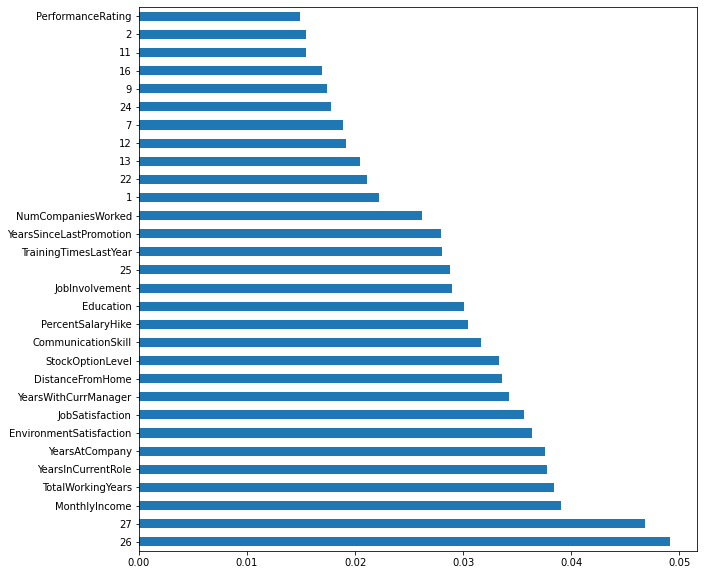

In [7]:
feat_importances = pd.Series(model.feature_importances_, index=X_training.columns)

plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [8]:
top30 = list(feat_importances.nlargest(28).index)

X_top30 = X_training[top30]
X_top30.head()

,26,27,MonthlyIncome,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,EnvironmentSatisfaction,JobSatisfaction,YearsWithCurrManager,DistanceFromHome,...,NumCompaniesWorked,1,22,13,12,7,24,9,16,11
0,1.0,0.0,2564,12,7,11,3,4,7,2,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,4663,7,2,3,3,3,1,12,...,9,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,5160,12,7,9,3,4,3,2,...,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,4108,18,7,7,1,4,7,24,...,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,9434,10,7,10,3,3,8,3,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top30, y, test_size=0.1, random_state=420)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, class_weight='balanced', criterion='entropy', random_state=420)
model.fit(X_train, y_train)
# predict_train = model.predict_proba(X_train)[:,1]
# predict_test  = model.predict_proba(X_test)[:,1]

model.score(X_test, y_test)

0.9754601226993865

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

[[76  4]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.95      1.00      0.98        83

    accuracy                           0.98       163
   macro avg       0.98      0.97      0.98       163
weighted avg       0.98      0.98      0.98       163



In [11]:
test_ = pd.read_csv('../input/summeranalytics2020/test.csv')
test = test_.drop(['Id', 'EmployeeNumber'], axis=1)
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,Travel_Rarely,Research & Development,9,3,Medical,4,Male,3,Research Scientist,...,4,1,5,3,5,2,0,4,5,1
1,31,Travel_Rarely,Sales,6,4,Medical,1,Male,4,Sales Executive,...,4,2,13,4,7,7,5,7,3,1
2,37,Travel_Rarely,Research & Development,6,3,Medical,3,Male,4,Research Scientist,...,3,2,13,2,7,7,6,7,4,1
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,4,Female,2,Manufacturing Director,...,3,1,8,4,4,3,0,2,5,1
4,45,Non-Travel,Research & Development,4,2,Life Sciences,3,Male,3,Laboratory Technician,...,3,0,9,5,9,7,0,8,2,1


In [12]:
ohe_test = pd.DataFrame(ohe.fit_transform(test[Cat_col]))
ohe_test.index = test.index
test_num = test.drop(Cat_col, axis=1)
test_data = pd.concat([test_num, ohe_test], axis=1)

test_data_top30 = test_data[top30]

prediction = model.predict_proba(test_data_top30)[:,1]

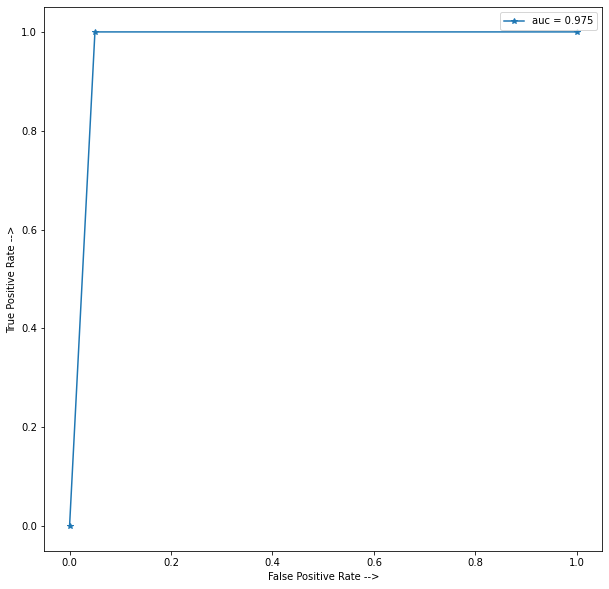

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-',marker='*', label='auc = %0.3f'%auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

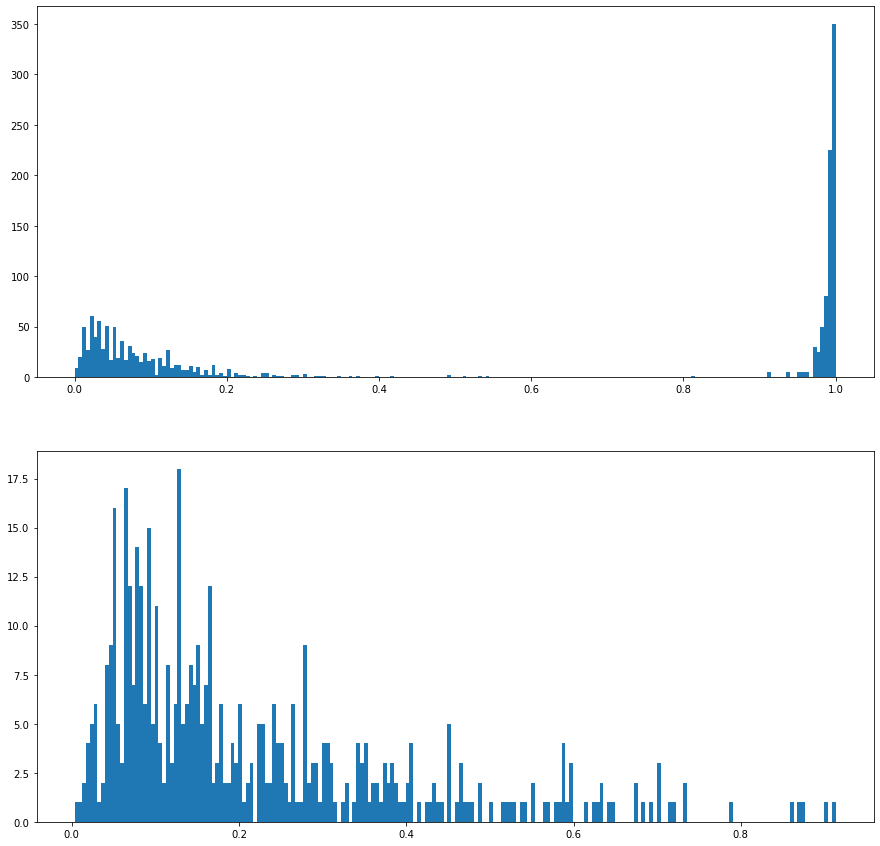

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

ax1.hist(model.predict_proba(X_top30)[:,1],bins=200)
ax2.hist(model.predict_proba(test_data_top30)[:,1], bins=200)
plt.show()

In [15]:
output = pd.Series(prediction)
output_final = pd.concat([test_['Id'], output], axis=1)
output_final.columns=['Id', 'Attrition']
output_final.set_index('Id',inplace=True)
output_final.describe()

,Attrition
count,470.000000
mean,0.217738
std,0.182771
min,0.003333
25%,0.083333
50%,0.153333
75%,0.295000
max,0.913333


In [16]:
output_final.to_csv('sub.csv')